##  Intro to Geopandas-I

## Geopandas, and standard vector primitives 

**Geopandas** is a package used to process vector spatial data - though it can be used in conjunction with raster libraries such as rasterio. **Vector** data are typically used to represent discrete geometric objects which can be modeled as points, lines and polygons. By contrast, **raster** representations are often used to show continuously varying fields, where we can measure or estimate a value at any given location. Some spatial data structures (e.g., TIN) don't fall into this simplistic classification - but we'll cover them later.

Some of the most common types of planar vector entities include Points, Lines, Polygons, and their multipart varieties: Multi-Points, Multi-Lines, Multi-Polygons.  These  types are defined in OGC Simple Features spec, also adopted as ISO 19125 (https://en.wikipedia.org/wiki/Simple_Features). 

**New terms:**

**Open Geospatial Consortium** (OGC, https://www.opengeospatial.org/): international consortium of more than 530 organizations, to develop open geospatial standards.

**International Organization for Standardization** (ISO, https://www.iso.org): develops and publishes international standards.

The multipart varieties are used for entities that cannot be described by a single geometric primitive. For example, the state of Michigan is composed of two distinct peninsulas, and is often represented as Multi-Polygon. Regardless of the complexity of the underlying geometry, it is still a single feature.

There are also mixed collections (a Geometry Collection may include items of all dimensional types) - but most software packages don't work with them, and there is a limited set of operations you can do over such collections. 

Geopandas adds vector geometry and spatial operations to Pandas. It integrates with several open source libraries for specific operations: **fiona** for reading and writing files, **shapely** for geometric operations, **pyproj** for coordinate conversion, **pysal** for (some) thematic mapping, **folium** for interactive mapping, **rasterio** for raster manipulations, **rtree** for spatial indexing.



## When to use and not to use Geopandas
Best for: exploratory data analysis with Jupyter notebooks, esp. if you are familiar with Pandas.

Not good for:
* working across multiple coordinate systems (doesn't reproject on the fly; doesn't allow to mix projections in an operation)
* when speed is an issue; 
* when you need to produce publishable maps.

In [ ]:
# Required libraries. Uncomment and run if needed.
!pip install --user geopandas
!pip install --user descartes #to plot geopandas data frames
!pip install --user mapclassify #to develop map classifications. Formerly part of PySAL (until 2.0)


In [2]:
%matplotlib inline 
import geopandas # to be able to see maps
import pandas as pd

import os
current_dir = os.getcwd()
print(current_dir)
geopandas.__version__

/Users/kaushikramganapathy/Downloads


'0.10.2'

Pandas uses __Series__; Geopandas uses __GeoSeries__, which is geometry column plus __index__.   The types of geometric objects that can be in the geometry column are Point, Line, Polygon, and their multipart extensions. **While a GeoSeries can mix geometric objects of different dimensions in one column, this is not recommended!!** Some operations won't work.

Reading data into Geopandas, using **read_file** from a shapefile. (can also read from URLs)

What is a **shapefile**? See https://en.wikipedia.org/wiki/Shapefile and https://gisgeography.com/arcgis-shapefile-files-types-extensions/
Not the most convenient way to exchange spatial data...

In [4]:
# Reading a shapefile into geopandas

shpFileIn = "/Users/kaushikramganapathy/Downloads/ZipCodes/ZipCodes.shp"

colorado = geopandas.read_file(shpFileIn)



In [6]:
# Let's explore the "geometry" column
colorado.head(50)


ZIP5 COUNTYNBR              NAME  SYMBOL     SHAPE_Leng    SHAPE_Area  \
0   84621        20            AXTELL       1   99397.166944  1.927710e+08   
1   84622        20       CENTERFIELD       2   49155.163665  7.321481e+07   
2   84634        20          GUNNISON       4  134212.044982  3.880393e+08   
3   84638        14        LEAMINGTON       5   36542.276126  4.651380e+07   
4   84728        14          GARRISON       4  412886.987684  8.294542e+09   
5   84542         4        WELLINGTON       3   33686.303141  2.095440e+07   
6   84647        20    MOUNT PLEASANT       1  194381.915032  5.680375e+08   
7   84501         4             PRICE       2  199408.726952  6.920492e+08   
8   84520         4       EAST CARBON       1  161051.526269  6.908944e+08   
9   84539         4         SUNNYSIDE       5  242792.256097  1.573290e+09   
10  84645        12              MONA       1   67998.060684  2.433350e+08   
11  84045        25  SARATOGA SPRINGS       2   39438.264663  5.516711e+07   
12  84013        25      CEDAR VALLEY       3  100000.594901  3.891936e+08   
13  84065        18          RIVERTON       5   51491.222233  9.490273e+07   
14  84070        18             SANDY       1   25830.961533  1.964740e+07   
15  84094        18             SANDY       3   22365.286973  1.339713e+07   
16  84093        18             SANDY       5   21282.086840  1.441928e+07   
17  84088        18       WEST JORDAN       2   34417.716543  2.611077e+07   
18  84081        18       WEST JORDAN       4   33112.041129  3.584960e+07   
19  84034        23            IBAPAH       2  224357.306280  2.165919e+09   
20  84120        18    SALT LAKE CITY       1   28301.047024  2.630611e+07   
21  84128        18    SALT LAKE CITY       4   31921.811226  2.391241e+07   
22  84115        18    SALT LAKE CITY       1   22554.326669  1.612721e+07   
23  84105        18    SALT LAKE CITY       3   14124.200503  7.836379e+06   
24  84102        18    SALT LAKE CITY       1   14376.738619  4.952617e+06   
25  84111        18    SALT LAKE CITY       2   10407.312533  3.669332e+06   
26  84101        18    SALT LAKE CITY       5   10043.800216  4.915983e+06   
27  84044        18             MAGNA       2   64562.937707  1.495873e+08   
28  84150        18    SALT LAKE CITY       1    1944.644162  2.214404e+05   
29  84122        18    SALT LAKE CITY       3    9428.660170  5.448401e+06   
30  84103        18    SALT LAKE CITY       4   46092.189485  3.935322e+07   
31  84116        18    SALT LAKE CITY       1  122563.643447  3.252898e+08   
32  84047        18           MIDVALE       4   22391.461202  1.519005e+07   
33  84117        18    SALT LAKE CITY       1   18614.857760  1.473331e+07   
34  84087         6       WOODS CROSS       3   29719.360384  3.431830e+07   
35  84005        25    EAGLE MOUNTAIN       5   42553.985997  7.986794e+07   
36  84124        18    SALT LAKE CITY       5   40040.395879  3.060628e+07   
37  84106        18    SALT LAKE CITY       4   18900.804075  1.560278e+07   
38  84025         6        FARMINGTON       5   70739.349341  1.411422e+08   
39  84401        29             OGDEN       5   83277.173028  1.079523e+08   
40  84055        22            OAKLEY       1   91513.388449  2.519621e+08   
41  84061        22              PEOA       4   54658.883434  9.527401e+07   
42  84036        22             KAMAS       5  192892.419378  8.219641e+08   
43  84042        25            LINDON       5   24248.851657  1.858250e+07   
44  84098        22         PARK CITY       3   74646.157006  1.734755e+08   
45  84339         3        WELLSVILLE       4  102356.006564  1.894726e+08   
46  84333         3          RICHMOND       4  137577.372534  5.266708e+08   
47  84414        29             OGDEN       5   43285.448212  5.848225e+07   
48  84404        29             OGDEN       3  138620.362038  5.651517e+08   
49  84301         2   BEAR RIVER CITY       5   12992.667128  4.637632e+06   

                          

Geopandas data frame includes a __geometry__ column, which contains vector coordinates of standard types of shapes.

Notice that here geometry is presented as text, in the so called Well-Known Text (WKT) format, also specified by OGC and ISO (https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). 



The read_file method knows a lot of input formats, thanks to GDAL/OGR (https://www.gdal.org/) wrapped in fiona

Here is how you read a file from a URL (see http://geojson.xyz/). This is a useful collection of files that are easy to import.


<AxesSubplot:>

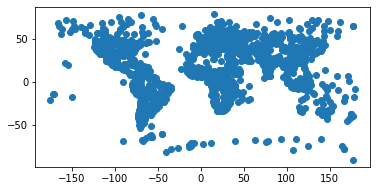

In [7]:
# For example, retrieve Populated Places from geojson.xyz
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson"
pop_places = geopandas.read_file(url)
pop_places.plot()

# writing files is similar: 
# colorado.to_file('zipcodes_colorado.shp') 

GeoJSON uses the same set of graphic primitives, and a similar encoding: see https://en.wikipedia.org/wiki/GeoJSON and http://geojson.org. 

You experimented with GeoJSON in DSC80. Good sources of geojson files are: 
1. http://geojson.io (to create and view small GeoJSON files), 
1. https://github.com/datasets/geo-countries/blob/master/data/countries.geojson, and 
1. https://datahub.io/core/geo-countries (countries in GeoJSON), 
1. https://catalog.data.gov/dataset (US government data), 
1. http://geojson.xyz (random spatial datasets).

You may need those for projects!

Shapefiles is one of the most widely used  file formats. KML is another common one. But there are many others. See https://en.wikipedia.org/wiki/GIS_file_formats for a more complete list. Importing different formats into your project, and transforming them for use with your other data, is a big part of what GIS people do. 

In the Open Source world, OGR deals with vector data format translation (while GDAL deals with raster data). They are wrapped by fiona, which is what Geopandas rely on for reading and saving files (https://github.com/Toblerity/Fiona)  

In [8]:
# let's refresh our pandas knowledge:

# how many records are in the dataframe
colorado.count()

# what are other ways to find the number of records?

ZIP5          300
COUNTYNBR     300
NAME          300
SYMBOL        300
SHAPE_Leng    300
SHAPE_Area    300
geometry      300
dtype: int64

Notice that the records here have unique ZIP5 values. 
See about zip codes at https://en.wikipedia.org/wiki/ZIP_Code ("Zone Improvement Plan", 5-digit zip codes in use since 1963).

Often, US administrative records are referenced by **FIPS Codes**. FIPS codes are used in many areas, not only as place codes.

AXTELL
POLYGON ((428991.2000000002 4325470.5, 428992.0999999996 4325242, 429527.8600000003 4325380.289999999, 430219.2999999998 4325238.699999999, 431557.2000000002 4325452.1, 431573.2000000002 4325479.5, 431613.0999999996 4325503.5, 431648.2000000002 4325520, 431683.2999999998 4325539.5, 431702 4325558, 431725.2000000002 4325572, 431863.2000000002 4325663.699999999, 431879.2000000002 4325677, 431919.5 4325680, 431934.2000000002 4325702, 431948.2000000002 4325717.1, 431970.7000000002 4325731, 431991.4000000004 4325755, 432012.7000000002 4325777, 432041.2000000002 4325792, 432068.4000000004 4325802.5, 432140.2000000002 4325783, 432197.4000000004 4325759, 432247.2999999998 4325729, 432307.7000000002 4325697.5, 432364.9000000004 4325669.5, 432422.0999999996 4325643.5, 432469.4000000004 4325616, 432507.5 4325602.5, 432537.7999999998 4325596.5, 432563.5999999996 4325600.5, 432588.7999999998 4325614.199999999, 432620.7000000002 4325638.5, 432643.9000000004 4325652.9, 432670.4000000004 432566

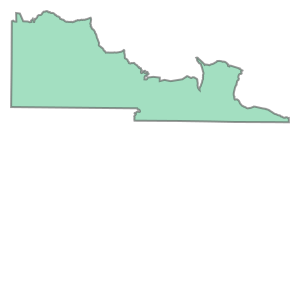

In [9]:
# look at a single polygon:

print(colorado.loc[0, 'NAME'])  # returns name of the first county
print(colorado.loc[0, 'geometry']) # returns geometry content of the first county
colorado.loc[0, 'geometry'] # plots the geometry


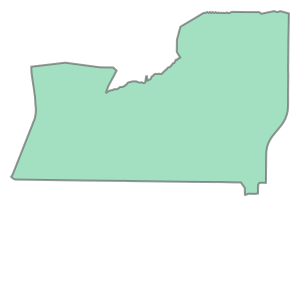

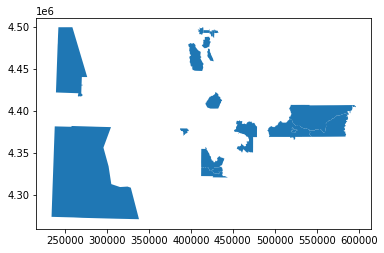

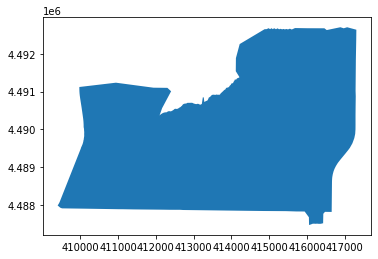

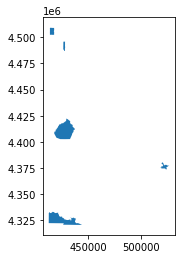

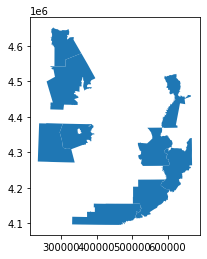

In [10]:
# A brief pandas test...
# Guess what these operations do?
# Which of them would generate an error?
# Which two would produce the same result (almost)
# What will happen if we just run this cell?

colorado.iloc[0:20].plot()

# colorado.loc[300].plot()

colorado.loc[299:300].plot()

colorado.loc[{0,5,10,15,20}].plot()

colorado.loc[colorado['SHAPE_Area']> 5000000000].plot()

colorado.loc[299, 'geometry']


## Let's create a map!

<AxesSubplot:>

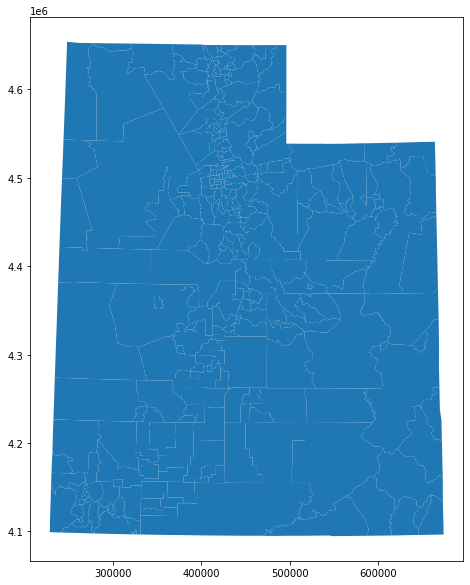

In [11]:
# PLOT will create a map using the Geometry column, and values in an attribute column

# Single symbol map
colorado.plot(figsize=(10,10))

<AxesSubplot:>

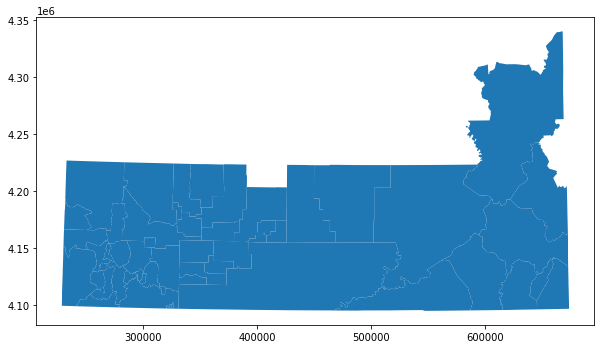

In [12]:
# map fragment: draw zip codes with coordinates south of 4200000
# cx is a coordinate-based indexer, in addition to standard Pandas indexes.

# What are standard indexes in pandas? 

# cx works over bounding boxes for each object: returns geometries that intersect a bounding box


south_colorado = colorado.cx[:,:4200000]

south_colorado.plot(figsize=(10,10))


New Term: **Bounding Box** (BBOX), also "minimum bounding rectangle (MBR)", "envelope": max extent of a 2D object in a given projection. Defined by minx, maxx, miny, maxy.
Commonly used for spatial indexing; as part of metadata; for a simple query. 

Experiment with bounding boxes at https://boundingbox.klokantech.com/


<AxesSubplot:>

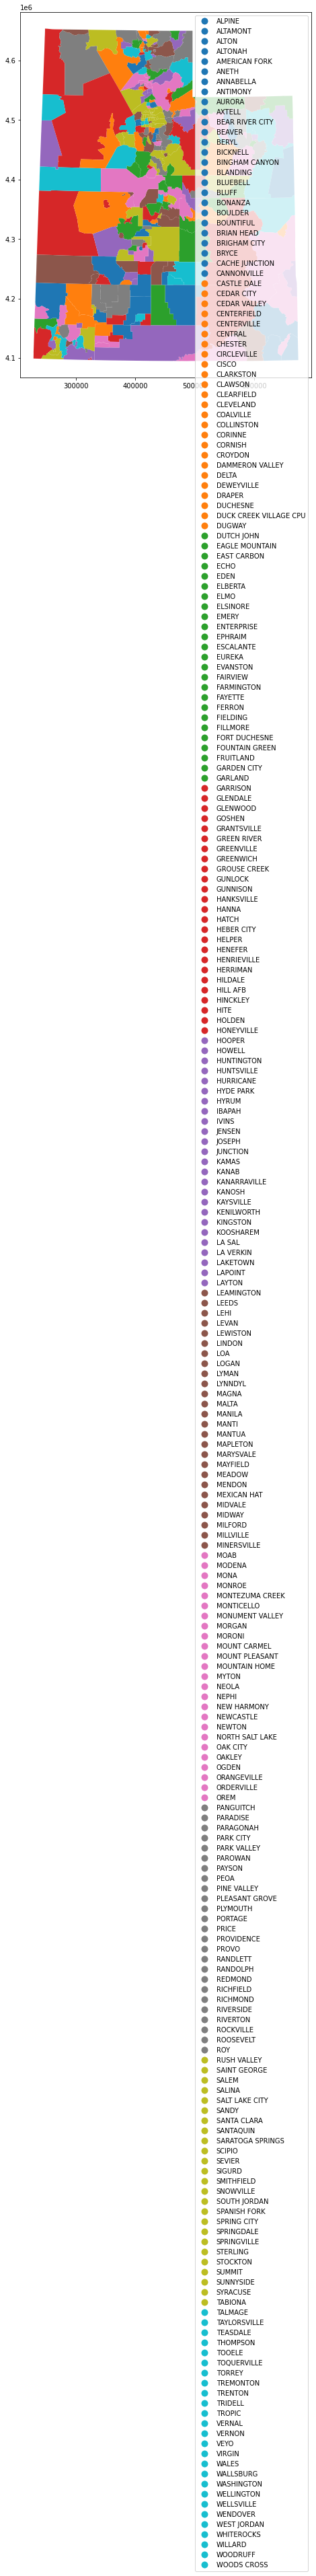

In [13]:
# Choropleth map
# if we want to show values for a specific column, add "column = "
# most maps would need a legend

colorado.plot(column='NAME', figsize=(10,10), legend = True)

# what if you use a different column, such as NAME? Experiment. Is this a choropleth map?
# For categorical variables, it simply assigns a different color hue to different values. 
# The goal is to show qualitative differences  - so color value or saturation not to be used.
# Adding  categorical=True isn't really critical here. Don't use a sequential color map (eg no cmap='OrRd')

# colorado.plot(column='NAME', figsize=(10,10), legend = True, categorical=True)


<AxesSubplot:>

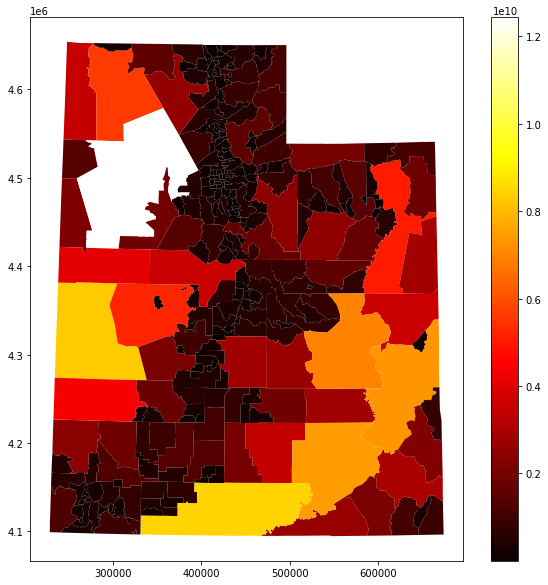

In [14]:
# Customize the choropleth map: specify a color map and add a legend
colorado.plot(column='SHAPE_Area', figsize=(10,10), cmap='hot', legend=True)

# Color maps are in https://matplotlib.org/users/colormaps.html (try hot, ocean, flag, terrain; Accent for categorical maps)

__Choropleth maps__ is a very common way to start data analysis where data are summarized and presented by areal units. However, the message of the map will be different depending on what classification (clustering) method you chose. The range of values can be split into intervals that are equal in size ('equal_intervals'), or have approximately the same number of items in each interval (equal frequency, or 'quantiles'), or follow natural breaks in the distribution (some form of discriminant analysis, or optimal arrangement of values into classes. Basically, k-means clustering). See https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization; https://en.wikipedia.org/wiki/Choropleth_map 

How to select colors for a choroleth map: http://colorbrewer2.org/

__Let's look at the Powerpoint again!__


<AxesSubplot:>

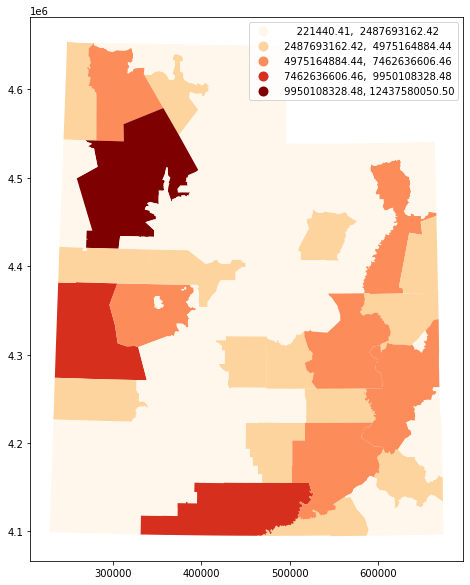

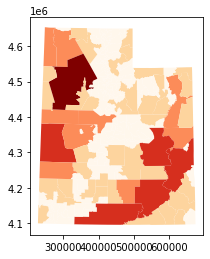

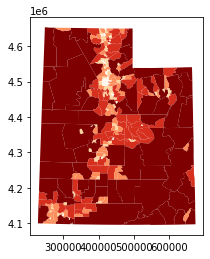

In [15]:
# Let's explore how different classification methods change the appearance of a map

import mapclassify
# https://github.com/geopandas/geopandas/issues/911. Some issues still with the move to Pysal 2.0.0 and the geopanas 0.4.1 fix

# Specifying classification sheme requires an additional library (originally a component of PySAL)
colorado.plot(column='SHAPE_Area', cmap='OrRd', scheme ='equal_interval', k=5, legend=True, figsize=(10,10))
colorado.plot(column='SHAPE_Area', cmap='OrRd', scheme ='fisher_jenks', k=5)
colorado.plot(column='SHAPE_Area', cmap='OrRd', scheme ='quantiles', k=5)

/Users/kaushikramganapathy/opt/anaconda3/envs/dsc170textbook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kaushikramganapathy/opt/anaconda3/envs/dsc170textbook/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Quantiles                               

            Interval               Count
----------------------------------------
[     221440.41,    36496394.33] |    60
(   36496394.33,   118420337.76] |    60
(  118420337.76,   347695328.34] |    60
(  347695328.34,   875655147.17] |    60
(  875655147.17, 12437580050.50] |    60

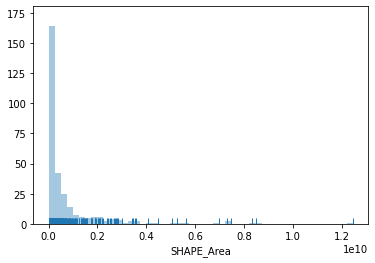

In [18]:
# let's see how the values are clustered:
import seaborn as sns  # This allows us to easily and beautifully plot
sns.distplot(colorado['SHAPE_Area'], rug=True, kde=False)

# Let's try: Quantiles, EqualInterval, FisherJenks, NaturalBreaks

allbins = mapclassify.Quantiles(colorado['SHAPE_Area'], k=5)
allbins

Think about the message of your map when you select symbology!

Now, let's look at another very common situation. To create a map, you often need to join geography and attribute data. Boundaries, lines, or point locations may come from a spatial data source and would contain some identifier for each record. Suppose these IDs (or some function of these IDs) match with IDs in another table. These could be country names or ISO codes; Zip codes, FIPS codesm names of natural features, etc. Then you need to join the two tables (one with geometry, another without).

In [19]:
# Let's look at a world map, and explore the table structure behind it

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
wmap = world.plot()
wmap.set_title("World Map")

Text(0.5, 1.0, 'World Map')

In [20]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<AxesSubplot:>

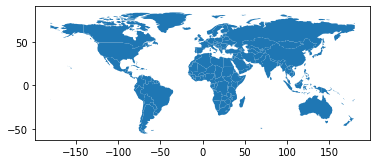

In [21]:
# remove areas we are not interested in:

world = world[(world.pop_est>0) & (world.name!= 'Antarctica')]
world.plot()

In [44]:
# now, let's import an Excel file with some data
# the source of the data is: http://sdgindex.org/reports/2018/ 
# (Citation: Sachs, J., Schmidt-Traub, G., Kroll, C., Lafortune, G., Fuller, G. (2018): 
# SDG Index and Dashboards Report 2018. New York: Bertelsmann Stiftung and Sustainable Development Solutions Network (SDSN).)
# see these data in SuAVE: https://suave-dev.sdsc.edu/main/file=ilyaj_SDG18_Geo.csv&views=1110101&view=bucket

country_data = pd.read_excel('/Users/kaushikramganapathy/Downloads/GlobalIndexResults_NEW.xlsx', header=None)
country_data.columns = country_data.iloc[1] 
country_data = country_data.iloc[2:,:]# country_data.head()

In [45]:
country_data.head()

1      country   id Global Index Score (0-100): 2018 version  \
2  Afghanistan  AFG                                46.238884   
3      Albania  ALB                                68.907867   
4      Algeria  DZA                                67.880407   
5      Andorra  AND                                      NaN   
6       Angola  AGO                                49.556541   

1 Global Index Rank: 2018 version Average score of spillover effects (0-100)  \
2                             151                                  93.781152   
3                              62                                  88.746658   
4                              68                                  96.838716   
5                             NaN                                        NaN   
6                             144                                  98.659106   

1 UN sub-region name Regions used for the SDG Index & Dashboard  \
2      Southern Asia                        E. Europe & C. Asia   
3    Southern Europe                        E. Europe & C. Asia   
4    Northern Africa                                       MENA   
5    Southern Europe                        E. Europe & C. Asia   
6      Middle Africa                                     Africa   

1 Regional Score (0-100) Income Group in 2016  \
2              69.473927                  LIC   
3              69.473927                 UMIC   
4              62.084852                 UMIC   
5              69.473927                  HIC   
6              52.774377                 UMIC   

1 Country is an OECD member, yes=1 no=0 Population in 2017  \
2                                     0           35530081   
3                                     0            2930187   
4                                     0           41318142   
5                                     0              76965   
6                                     0           29784193   

1 GDP per capita, PPP in 2016 Poverty headcount ratio at $1.90/day (%)  \
2                 1802.695566                                34.565217   
3                11359.170404                                  0.38583   
4                13921.180022                                 0.312488   
5                         NaN                                      NaN   
6                 5984.640422                                30.482483   

1 Projected poverty headcount ratio at $1.90/day (%) in 2030  \
2                                            16.5838           
3                                           0.090323           
4                                           0.330385           
5                                                NaN           
6                                          24.851364           

1 Prevalence of undernourishment (%) Prevalence of stunting, under-5s (%)  \
2                                 23                            59.299999   
3                                4.9                                 23.1   
4                                4.6                                 11.7   
5                               1.17                                 2.58   
6                                 14                            29.200001   

1 Prevalence of wasting, under-5s (%) Prevalence of adult obesity (%)  \
2                                 8.6                             5.5   
3                                 9.4                            21.7   
4                                 4.1                            27.4   
5                                 0.7                            25.6   
6                                 8.2                             8.2   

1 Cereal yield (t/ha) Sust. Nitrogen Management Index  \
2              1.9817                             NaN   
3              4.7164                        0.974022   
4              1.5607                        0.827783   
5                 NaN                             NaN   
6              0.9347                        0

<AxesSubplot:>

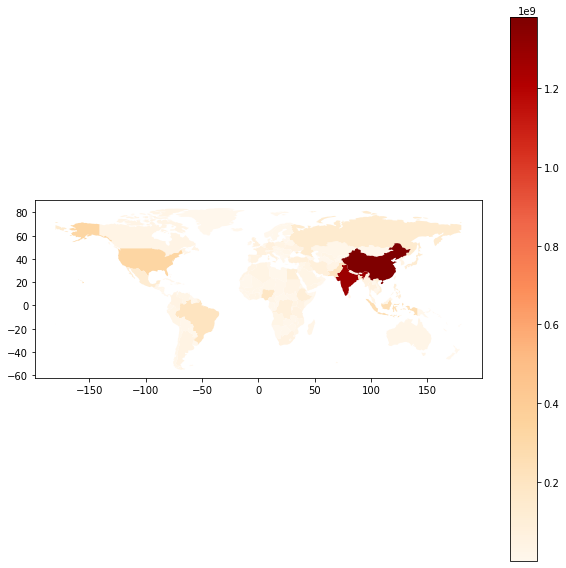

In [46]:
# we can plot data that is already in the geodataframe, eg:

world.plot(column='pop_est', cmap='OrRd', k=5, legend=True, figsize=(10,10))

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2   35623680  North America                    Canada    CAN   1674000.0   
3  326625791  North America  United States of America    USA  18560000.0   
4   18556698           Asia                Kazakhstan    KAZ    460700.0   

                                            geometry        country   id  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...           Fiji  FJI   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       Tanzania  TZA   
2  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         Canada  CAN   
3  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States  USA   
4  POLYGON ((87.35997 49.21498, 86.59878 48.54918...     Kazakhstan  KAZ   

  Global Index Score (0-100): 2018 version Global Index Rank: 2018 version  \
0                                      NaN                             NaN   
1                                55.147616                             123   
2                                76.794908                              20   
3                                73.049647                              35   
4                                68.134465                              65   

  Average score of spillover effects (0-100) UN sub-region name  \
0                                        NaN          Melanesia   
1                                  98.518039     Eastern Africa   
2                                  72.839479   Northern America   
3                                   48.18251   Northern America   
4                                  98.384573       Central Asia   

  Regions used for the SDG Index & Dashboard Regional Score (0-100)  \
0                                    Oceania                    NaN   
1                                     Africa              52.774377   
2                                       OECD               76.86819   
3                                       OECD               76.86819   
4                        E. Europe & C. Asia              69.473927   

  Income Group in 2016 Country is an OECD member, yes=1 no=0  \
0                 UMIC                                     0   
1                  LIC                                     0   
2                  HIC                                     1   
3                  HIC                                     1   
4                 UMIC                                     0   

  Population in 2017 GDP per capita, PPP in 2016  \
0             905502                 8447.264216   
1           57310019                 2583.589673   
2           36624199                43238.259605   
3          324459463                53445.370589   
4           18204499                23446.565064   

  Poverty headcount ratio at $1.90/day (%)  \
0                                 0.358691   
1                                 37.65404   
2                                 0.409681   
3                                 0.516524   
4                                  0.02036   

  Projected poverty headcount ratio at $1.90/day (%) in 2030  \
0                                           0.037739           
1                                          14.808435           
2                                            0.39468           
3                                           0.490836           
4                                           0.006252           

  Prevalence of undernourishment (%) Prevalence of stunting, under-5s (%)  \
0                                4.6                                  7.5   
1                               32.3                            34.799999   
2                                2.5                                 2.58   
3                                2.5                                  2.1   
4                                2.5           

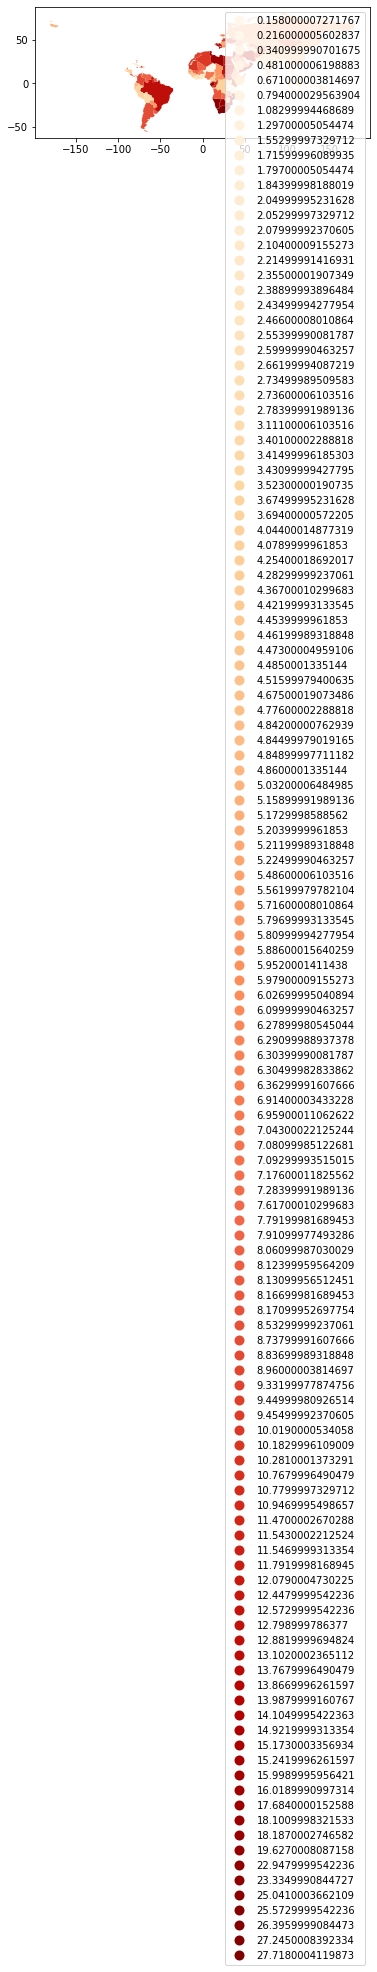

In [47]:
# or we can map any variable that is in the Excel file, once we join it to the shapes.
# notice that 'iso_a3' in the shapefile should match 'id' in the excel file (this is a 3-letter country code)

merged_df = pd.merge(world, country_data, left_on='iso_a3', right_on='id',how='inner', indicator=True)

# notice types of join: inner, outer, left, right. We are joining gdf (left) with df (right).
# Inner: only keep rows where the merge “on” value exists in both the left and right dataframes (the default).
# Left: keep every row in the left dataframe. Add NaN or empty for missing values in the result.
# Right: keep every row in the right dataframe. Add NaN or empty for missing values in the result.
# Outer: keep every row in both left and right dataframes. Add NaN or empty for missing values in the result.

# may want to add indicator = True to create a "_merge" column (not useful for the inner join)

# more resources: https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/; 
# http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html; 
# https://www.youtube.com/watch?v=XMjSGGej9y8 


world2 = merged_df.plot(column = 'Unemployment rate (%)', cmap='OrRd',legend=True)

# It doesn't work! Why?!
# Well, maps (and other visual representations) are useful to spot data problems
merged_df.head()

In [48]:
# In real world, there are ALWAYS problems with data... 
# Let's eyeball it

pd.set_option('display.max_columns', None)
country_data.head(200)

# country_data.info(verbose=True)



1          country   id Global Index Score (0-100): 2018 version  \
2      Afghanistan  AFG                                46.238884   
3          Albania  ALB                                68.907867   
4          Algeria  DZA                                67.880407   
5          Andorra  AND                                      NaN   
6           Angola  AGO                                49.556541   
..             ...  ...                                      ...   
190  Venezuela, RB  VEN                                64.000581   
191        Vietnam  VNM                                69.669595   
192    Yemen, Rep.  YEM                                45.657508   
193         Zambia  ZMB                                53.128743   
194       Zimbabwe  ZWE                                58.760057   

1   Global Index Rank: 2018 version  \
2                               151   
3                                62   
4                                68   
5                               NaN   
6                               144   
..                              ...   
190                              93   
191                              57   
192                             152   
193                             129   
194                             115   

1   Average score of spillover effects (0-100)  UN sub-region name  \
2                                    93.781152       Southern Asia   
3                                    88.746658     Southern Europe   
4                                    96.838716     Northern Africa   
5                                          NaN     Southern Europe   
6                                    98.659106       Middle Africa   
..                                         ...                 ...   
190                                  97.450625       South America   
191                                  96.215646  South-Eastern Asia   
192                                  93.366691        Western Asia   
193                                  98.874724      Eastern Africa   
194                                  95.773046      Eastern Africa   

1   Regions used for the SDG Index & Dashboard Regional Score (0-100)  \
2                          E. Europe & C. Asia              69.473927   
3                          E. Europe & C. Asia              69.473927   
4                                         MENA              62.084852   
5                          E. Europe & C. Asia              69.473927   
6                                       Africa              52.774377   
..                                         ...                    ...   
190                                        LAC              66.017883   
191                          East & South Asia              64.087149   
192                                       MENA              62.084852   
193                                     Africa              52.774377   
194                                     Africa              52.774377   

1   Income Group in 2016 Country is an OECD member, yes=1 no=0  \
2                    LIC                                     0   
3                   UMIC                                     0   
4                   UMIC                                     0   
5                    HIC                                     0   
6                   UMIC                                     0   
..                   ...                                   ...   
190                 UMIC                                     0   
191                 LMIC                                     0   
192                 LMIC                                     0   
193                 LMIC                                     0   
194                  LIC                                     0   

1   Population in 2017 GDP per capita, PPP in 2016  \
2             35530081                 1802.695566   
3              2930187                11359.170404   
4             41318142                139

In [49]:
# but doesn't work if there is a lot of data...

# country_data.describe()

# these are columns that have missing values 
country_data.isnull().any()

# or 
country_data.isna().any()

# (are they identical? Yes. Why pandas has two? 
# See https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)

# alternatively:
# [col for col in country_data.columns if country_data[col].isnull().any()]




1
country                                       False
id                                            False
Global Index Score (0-100): 2018 version       True
Global Index Rank: 2018 version                True
Average score of spillover effects (0-100)     True
                                              ...  
Goal 13 Score                                  True
Goal 14 Score                                  True
Goal 15 Score                                  True
Goal 16 Score                                  True
Goal 17 Score                                  True
Length: 245, dtype: bool

In [50]:
# let's fix it; replace NaN with 0s
# is this a correct approach??

import numpy as np
merged_df.replace(np.nan, 0, regex=True, inplace=True)
world2 = merged_df.plot(column = 'Unemployment rate (%)', cmap='OrRd', figsize=(10,10))
# merged_df.plot(column = 'Unemployment rate (%)', figsize=(10,10),cmap='OrRd', legend=True, k=4)

# Here is how you can save the output as an image (but for publication-quality images better use other tools)
# fig = world2.get_figure() 
# fig.savefig("output.png", dpi=300)

DISSOLVE is another very common operaiton when creating maps by areal units. Often, neighboring units have the same value, and the boundary between them is not needed. This is when you use DISSOLVE to aggregate such neighboring geometries with the same value. DISSOLVE removes interior boundaries of a set of polygons with the same attribute value and creates one new combined polygon.

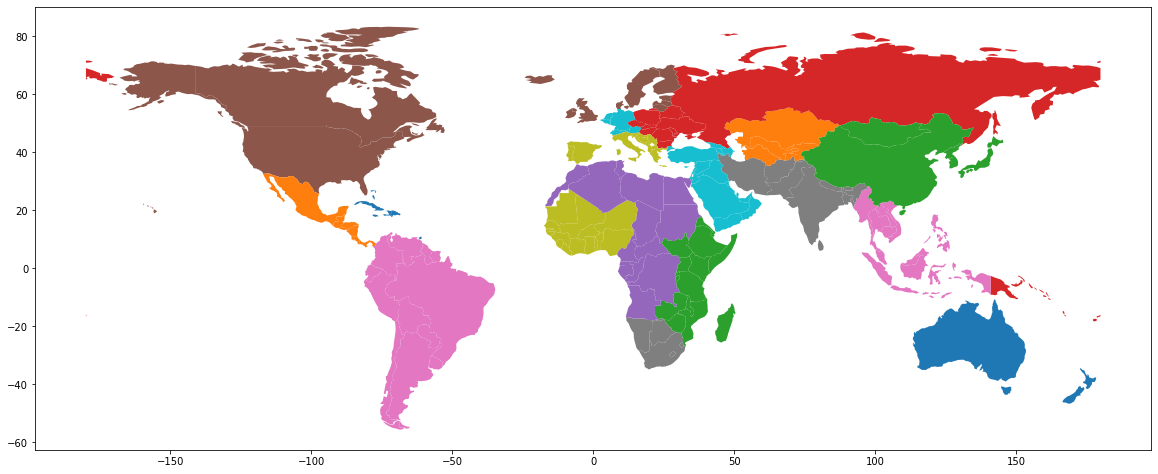

In [51]:
# Dissolving boundaries into larger areas
world2 = merged_df.plot(column = 'UN sub-region name', figsize=(20,20))

<AxesSubplot:>

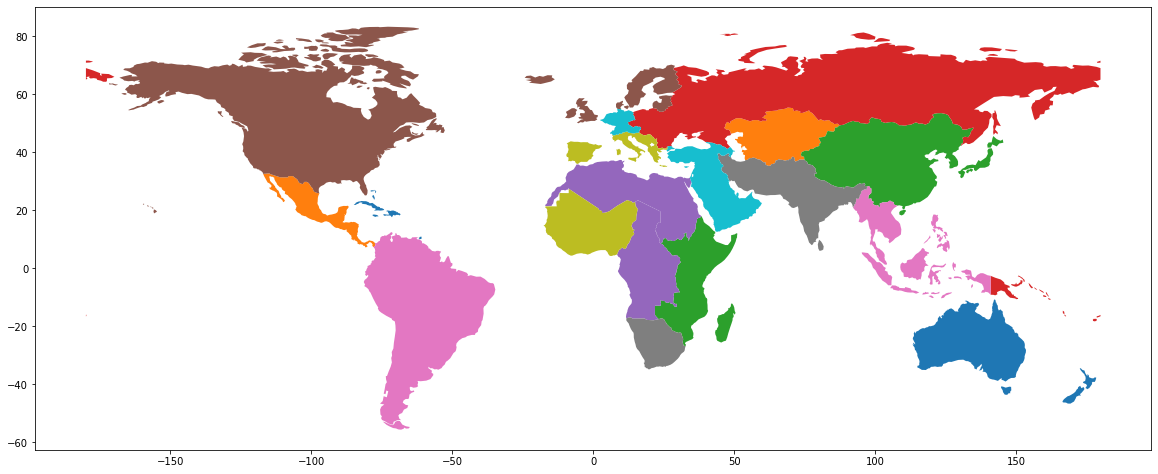

In [52]:
# create a new gdf with a subset of columns, and decide how to aggregate values in these columns (aggfunc)
# need at least three columns in the new gdf
cols = ['geometry','pop_est','UN sub-region name']
sub_regions = merged_df[cols].dissolve(by='UN sub-region name', aggfunc = 'sum', as_index=False)
sub_regions.plot(figsize=(20,20), column = 'UN sub-region name')

# aggfunc specifies how to compute attributes for the resultant polygons (first; last; min; max; sum; mean; median)

# Which non-spatial function is it similar to?

In [53]:
# what do you expect to get as content of this merged_df?

sub_regions[cols].head(50)

geometry     pop_est  \
0   MULTIPOLYGON (((171.12509 -42.51275, 171.56971...    27742740   
1   MULTIPOLYGON (((-60.93500 10.11000, -61.77000 ...    37067125   
2   POLYGON ((-77.43111 7.63806, -77.75341 7.70984...   170315976   
3   POLYGON ((80.11943 42.12394, 78.54366 41.58224...    67914511   
4   MULTIPOLYGON (((29.43219 -22.09131, 28.79466 -...   397797957   
5   MULTIPOLYGON (((109.11906 19.82104, 110.21160 ...  1585251851   
6   MULTIPOLYGON (((27.67390 42.57789, 27.99672 42...   292394404   
7   MULTIPOLYGON (((177.93266 -18.28799, 177.38146...     8761034   
8   POLYGON ((11.91496 -5.03799, 11.09377 -3.97883...   162812699   
9   POLYGON ((23.45901 8.95429, 23.39478 9.26507, ...   227400115   
10  MULTIPOLYGON (((-155.54211 19.08348, -155.6881...   362249471   
11  MULTIPOLYGON (((-9.97709 51.82045, -9.16628 52...    97198037   
12  MULTIPOLYGON (((-56.73749 -36.41313, -56.78829...   418537818   
13  MULTIPOLYGON (((123.98001 -9.29003, 124.96868 ...   640983062   
14  POLYGON ((31.98578 -26.29178, 32.07167 -26.733...    62966384   
15  MULTIPOLYGON (((97.13400 27.08377, 96.41937 27...  1813385691   
16  MULTIPOLYGON (((23.51498 35.27999, 23.69998 35...   155729636   
17  POLYGON ((-10.76538 6.14071, -11.43878 6.78592...   364095830   
18  MULTIPOLYGON (((51.17252 15.17525, 49.57458 14...   253293099   
19  POLYGON ((9.92284 46.31490, 9.18288 46.44021, ...   126754928   

           UN sub-region name  
0   Australia and New Zealand  
1                   Caribbean  
2             Central America  
3                Central Asia  
4              Eastern Africa  
5                Eastern Asia  
6              Eastern Europe  
7                   Melanesia  
8               Middle Africa  
9             Northern Africa  
10           Northern America  
11            Northern Europe  
12              South America  
13         South-Eastern Asia  
14            Southern Africa  
15              Southern Asia  
16            Southern Europe  
17             Western Africa  
18               Western Asia  
19             Western Europe

Maps often show more than one variable, and these variables may represent different types of geometries. **Organizing maps by layers of information is a very common approach in GIS and mapping.** Here, we will add a point layer of cities on top of the polygon layer.

Note that when maps get a bit more complex, with multiple layers and different symbology, you may want to have more control over the process. Composing the plot with matplotlib will give you more options. But overall: if you want production quality maps, do it in dedicated software.

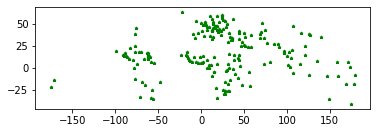

In [54]:
# now, let's add some more data to the map
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.plot(marker='*', color='green', markersize=8);

In [55]:
world2 = merged_df.plot(column = 'UN sub-region name', legend=True, figsize=(20,20))
cities.plot(ax=world2, marker='o', color='black', markersize=8);

# on this map, there is a base (world2), and cities are drawn on top of it

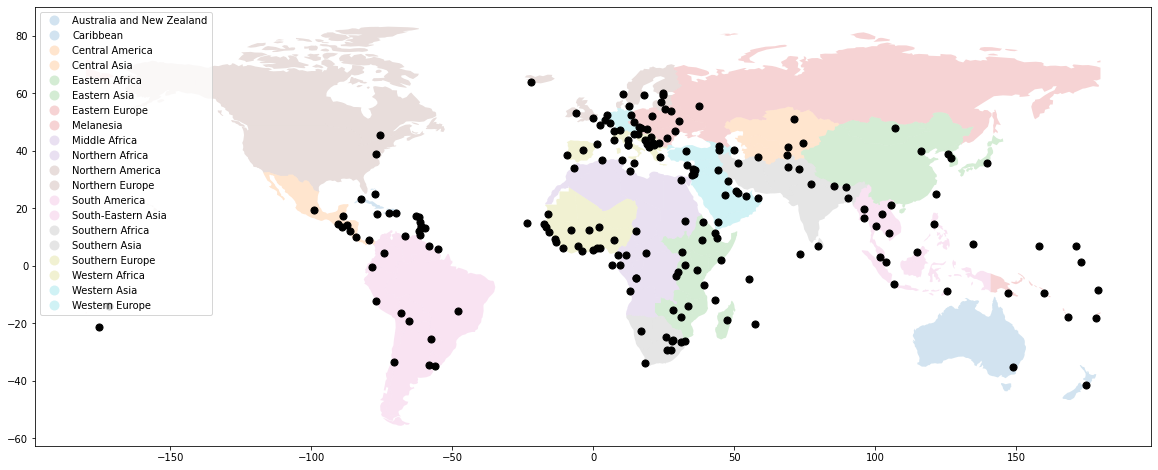

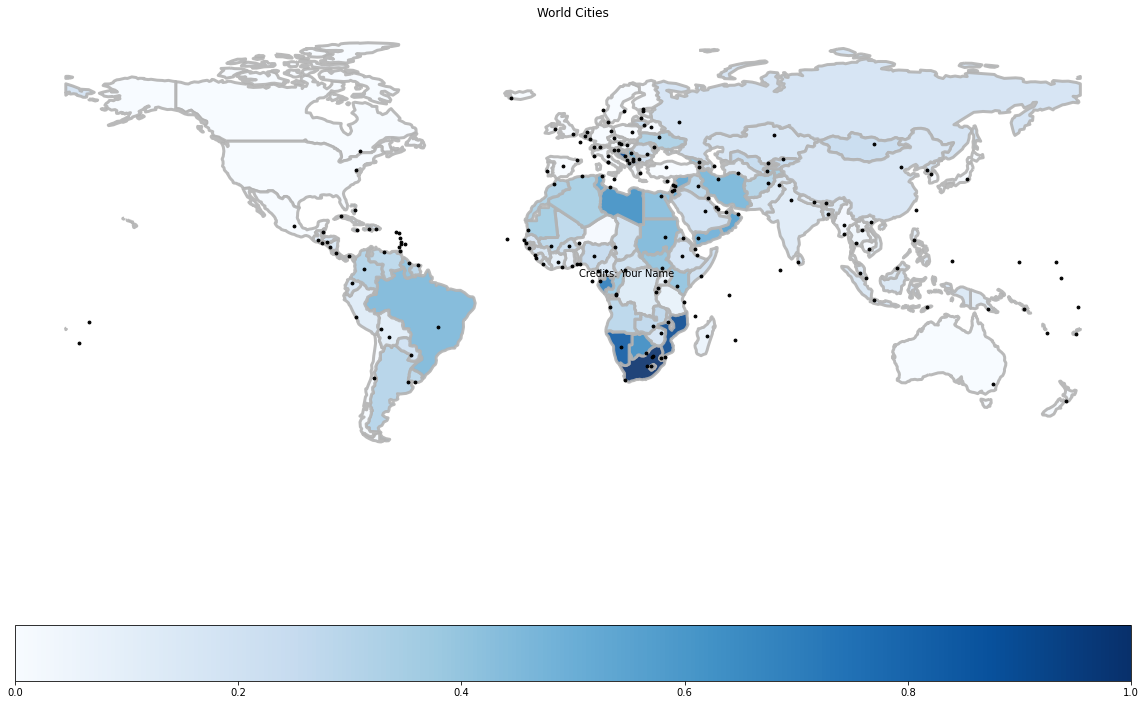

In [56]:
# Beautifications:

# transparency:
world2 = merged_df.plot(column = 'UN sub-region name', legend=True, figsize=(20,20), alpha=0.2)
cities.plot(ax=world2, marker='o', color='black', markersize=50);

# remove axes:
world2 = merged_df.plot(column = 'UN sub-region name', legend=True, figsize=(20,20), alpha=0.2)
cities.plot(ax=world2, marker='o', color='black', markersize=8);
world2.set_axis_off()

# specifying line styles:

world2 = merged_df.plot(column = 'UN sub-region name', legend=True, figsize=(20,20), alpha=0.2, edgecolor='0.7', linewidth=3)
cities.plot(ax=world2, marker='*', color='black', markersize=8);
world2.set_axis_off()

# the map can be also plotted as matplotlib figure (like you did in DSC80?)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title ("World Cities")
ax.annotate('Credits: Your Name', xy=(2, 2))
world2 = merged_df.plot(column = 'Unemployment rate (%)', figsize=(10,10), alpha=0.9, edgecolor='0.7', linewidth=3, ax=ax, cmap='Blues')
cities.plot(ax=world2, marker='o', color='black', markersize=8);
world2.set_axis_off()
sm = plt.cm.ScalarMappable(cmap='Blues')
vmin, vmax = 0, 1
norm=plt.Normalize(vmin=vmin, vmax=vmax)
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal')

Now, let's create a proportional symbol map overlaid over a choropleth map. First, we need to define point locations to which we will attach country data. we'll use the same lowres world map, and create centroids for each country

In [57]:
rep_points = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
rep_points = rep_points[(rep_points.pop_est>0) & (rep_points.name!= 'Antarctica')]

rep_points['centroid'] = rep_points.centroid

# or:

rep_points['centroid'] = rep_points.representative_point()

# in the second case, Geopandas ensures that the point is within the originating polygon


/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46187/319891214.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rep_points['centroid'] = rep_points.centroid


In [58]:
# Now, switch geometry from polygon to points (ie, set a new active geometry column)

rep_points = rep_points.set_geometry('centroid')
rep_points.plot()

<AxesSubplot:>

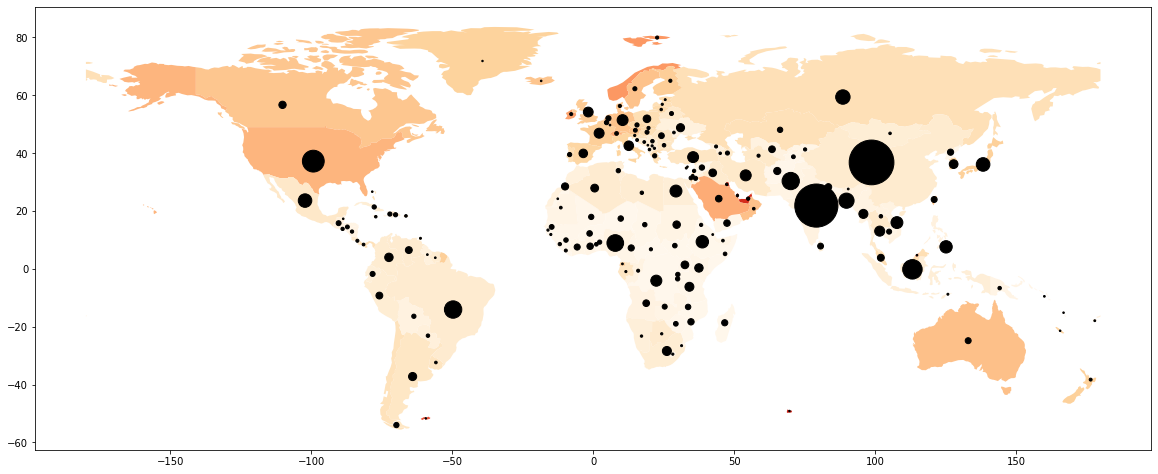

In [59]:
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']

base = world.plot(figsize=(20,20), column='gdp_per_cap', alpha=1, cmap='OrRd')

pop_max = rep_points['pop_est'].max()
pop_min = rep_points['pop_est'].min()

max_size = 2000
min_size = 2
rep_points.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(rep_points['pop_est']/pop_max));

# notice that markersize is not a constant; it is now computed based on other values
# this is a very simple way to scale points; other scaling functions can be used

In [60]:
# plotting with folium
import folium
from folium.plugins import MarkerCluster


ModuleNotFoundError: No module named 'folium'

In [61]:
rep_points.head()

# We can either use a new layer (eg cities, as below), 
# or transform the world geodataframe from polygons into points - as in the next cell

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [62]:
rep_points.head()
rep_points.set_geometry('centroid')
rep_points.drop(['geometry'], axis=1, inplace=True)
rep_points.rename(columns={'centroid': 'geometry'}) # need to rename to avoid issues with other packages

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                        geometry  
0    POINT (177.97595 -17.93762)  
1      POINT (34.14207 -6.20783)  
2     POINT (-12.57202 24.23056)  
3    POINT (-110.24381 56.70192)  
4     POINT (-99.31483 37.23675)  
..                           ...  
172    POINT (21.01348 44.13670)  
173    POINT (19.39622 42.75050)  
174    POINT (20.91367 42.51393)  
175   POINT (-61.29035 10.56250)  
176     POINT (28.97007 8.02715)  

[176 rows x 6 columns]

In [63]:
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")
# pjson = cities.to_json()


pjson = rep_points.to_json()

rps = folium.features.GeoJson(pjson)
map1.add_child(rps)


map1

NameError: name 'folium' is not defined

In [69]:
import folium
from folium.plugins import MarkerCluster

In [70]:
# same, using MarkerCluster
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")
locations = []
for idx, row in cities.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    
map1.add_child(MarkerCluster(locations=locations))

In [71]:
# references: https://ocefpaf.github.io/python4oceanographers/blog/2015/12/14/geopandas_folium/ 
# (see how to add popups)
# Also https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb 
# for the use of the Choropleth class

# set the map center and zoom
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")

# Then you can simply pass a geodataframe to the Choropleth class, 
# and specify the key (in the geodataframe) to be used for mapping
# You can convert to json (eg wjson = world.to_json() ) and explore it to make sure that the key_on is set correctly.
# Because internally it uses GeoJson class


folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['name','gdp_per_cap'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_weight=2,
#     bins=[0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2],
    legend_name='GDP per Capita',
    highlight=True, 
    nan_fill_color ='purple'
).add_to(map1)

map1.add_child(MarkerCluster(locations=locations))

map1

Check out folium examples at https://github.com/python-visualization/folium - they are cool!